In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import collections

%matplotlib inline
plt.style.use('ggplot')

In [12]:
def get_sheetnames(filename):
    '''
    Load xlsx spreadsheets into a pandas dataframe to obtain sheet names
    
    Input: filepath and name
    Output: a list of sheet names in xlsx workbook
    '''
    df = pd.ExcelFile(filename)
    return df.sheet_names

In [13]:
filenames = ['219-CATTRACKS Fall 2019- February Billing.xlsx', 'CATTRACKS Fall 2018- October Billing.xlsx']
xlsx_sheets = []

xlsx_sheets = [get_sheetnames(filename) for filename in filenames]

In [14]:
xlsx_sheets

[['CAT BILL',
  'FARES',
  'DELAYS',
  'BIKES',
  'C1 BLUE',
  'C1-GOLD',
  'C2 - EXPRESS',
  'SAT-SUN E1-LINE DOWNTOWN',
  'E1 HOLIDAY',
  'SAT-SUN E2-LINE HOUSING',
  'E2 HOLIDAY',
  'Fastcat',
  'G-Line',
  'Heritage 1 ',
  'Heritage 2',
  'SAT-SUND HERITAGE',
  'FR-SAT NITECAT',
  'PAX LEFT',
  'STANDBY',
  'AB LINE',
  'E-Line'],
 ['CAT BILL',
  'FARES',
  'STANDBY',
  'BIKES',
  'DELAYS',
  'AB LINE',
  'C1 BLUE',
  'C1-GOLD',
  'C2 - EXPRESS',
  'Fastcat',
  'Heritage 1 ',
  'Heritage 2',
  'G-Line',
  'SAT-SUN E1-LINE DOWNTOWN',
  'SAT-SUN E2-LINE HOUSING',
  'E-Line',
  'SAT-SUND HERITAGE',
  'FR-SAT NITECAT',
  'PAX LEFT']]


Based on assessment of csv data, most informative sheets in workbook consist of these bus lines:
 'C1 BLUE',
 'C1-GOLD',
 'C2 - EXPRESS',
 'G-Line'

Will only read those sheets into a pandas df and then into a dictionary to keep track of the bus line and its total load data.

Nota bene: Layout of load data in xlsx for bus lines 'C1 BLUE', 'C1-GOLD' and 'C2 - EXPRESS' are the same for both spreadsheets. The last bus line, 'G-Line' will have to be treated differently.

Will begin with analysis of first three bus lines below:


In [15]:
# Will revisit G-Line later
# use_sheets = ['C1 BLUE', 'C1-GOLD', 'C2 - EXPRESS', 'G-Line']
# df_names = ['c1_blue', 'c1_gold', 'c2_exp', 'g_line']

use_sheets = ['C1 BLUE', 'C1-GOLD', 'C2 - EXPRESS']
feb_df_names = ['feb_c1_blue', 'feb_c1_gold', 'feb_c2_exp']
oct_df_names = ['oct_c1_blue', 'oct_c1_gold', 'oct_c2_exp']

In [16]:
file1 = '219-CATTRACKS Fall 2019- February Billing.xlsx'
file2 = 'CATTRACKS Fall 2018- October Billing.xlsx'

feb_dicts = {}
oct_dicts = {}
for i in range(len(feb_df_names)):
    feb_dicts[feb_df_names[i]] = pd.read_excel(file1, use_sheets[i])
    oct_dicts[oct_df_names[i]] = pd.read_excel(file2, use_sheets[i])

# feb_dicts
# oct_dicts

In [17]:
# Want an ordered dictionary since I am using brute means to slice data

collections.OrderedDict(feb_dicts)
collections.OrderedDict(oct_dicts)
feb_dicts.keys()
oct_dicts.keys()

dict_keys(['oct_c1_blue', 'oct_c1_gold', 'oct_c2_exp'])

In [18]:
# Hate that I am doing this brute force, but didn't know how to slice these totals otherwise.
# Can loop through key names, but cannot loop through iloc portion

feb_c1b = feb_dicts['feb_c1_blue'].iloc[4:25, 86:101]
feb_c1g = feb_dicts['feb_c1_gold'].iloc[4:25, 81:95]
feb_c2e = feb_dicts['feb_c2_exp'].iloc[4:19, 106:125]

oct_c1b = oct_dicts['oct_c1_blue'].iloc[4:25, 86:101]
oct_c1g = oct_dicts['oct_c1_gold'].iloc[4:25, 81:95]
oct_c2e = oct_dicts['oct_c2_exp'].iloc[4:19, 106:125]

In [19]:
# Step above removed use of dictionaries. Just pandas dfs now

print(type(feb_c1b), type(oct_c2e))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [ ]:
# feb_c1g, oct_c1b

In [20]:
# Only c1_blue and c1_gold lines have Nans in first column.

nans_lst = [feb_c1g, feb_c1b, oct_c1b, oct_c1g]

for df in nans_lst:
    df.dropna(inplace=True)
#     print(df)

In [ ]:
# feb_c2e, oct_c2e

In [21]:
# Columns labeled 'Unnamed: 123' contains Nan in first row. All other values in that column = 0
# No viable data. Remove columns

feb_c2e = feb_c2e.drop(columns=['Unnamed: 123'])
oct_c2e = oct_c2e.drop(columns=['Unnamed: 123'])

# feb_c2e, oct_c2e

In [22]:
# Use similar brute force process to slice G-line data:
# Don't forget to load the spreadsheet first.

file1 = '219-CATTRACKS Fall 2019- February Billing.xlsx'
file2 = 'CATTRACKS Fall 2018- October Billing.xlsx'

feb_g_line = pd.read_excel(file1, 'G-Line')
oct_g_line = pd.read_excel(file2, 'G-Line')

feb_g = feb_g_line.iloc[4:17, 101:119]
oct_g = oct_g_line.iloc[4:17, 91:107]

# feb_g, oct_g

,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106
4,"""G"" Line (Amtrak)",600.0,707.0,834,941.0,1048.0,1215,1322.0,1429,1556.0,1703.0,1810.0,1917.0,2024.0,REQ,TOTAL
5,"Village Apts ""R"" Street",13.0,8.0,49,27.0,10.0,29,9.0,11,2.0,4.0,0.0,1.0,5.0,0,168
6,El Redondo,2.0,127.0,199,123.0,96.0,74,37.0,39,34.0,29.0,14.0,10.0,0.0,0,784
7,Compass Pointe,2.0,66.0,165,71.0,59.0,64,26.0,50,32.0,21.0,2.0,4.0,1.0,0,563
8,Merced College,5.0,6.0,38,37.0,25.0,15,4.0,19,26.0,2.0,4.0,12.0,2.0,0,195
9,Ironstone,11.0,39.0,88,72.0,42.0,17,28.0,6,14.0,5.0,3.0,2.0,1.0,0,328
10,Arrow Wood Dr.,19.0,76.0,269,201.0,155.0,61,176.0,56,72.0,14.0,24.0,20.0,2.0,0,1145
11,Muir Pass,16.0,32.0,23,43.0,110.0,69,193.0,157,104.0,168.0,98.0,74.0,56.0,0,1143
12,Scholars/Emigrant Pass,16.0,25.0,1,26.0,35.0,15,59.0,44,46.0,72.0,65.0,13.0,21.0,0,438
13,Amtrak,1.0,16.0,29,6.0,6.0,35,4.0,29,13.0,32.0,27.0,13.0,14.0,0,225


In [23]:
# Columns labelled Unnamed: 117 and Unnamed: 105 do not contain data. Remove them
feb_g = feb_g.drop(columns=['Unnamed: 117'])
oct_g = oct_g.drop(columns=['Unnamed: 105'])
feb_g, oct_g

(               Unnamed: 101  Unnamed: 102  Unnamed: 103 Unnamed: 104  \
 4         "G" Line (Amtrak)         540.0         647.0          814   
 5   Village Apts "R" Street          16.0          66.0          278   
 6                El Redondo           9.0         161.0          296   
 7            Compass Pointe          23.0         100.0          210   
 8            Merced College           5.0           7.0           19   
 9                 Ironstone          15.0          29.0           63   
 10           Arrow Wood Dr.          13.0          61.0          128   
 11                Muir Pass          10.0          19.0            5   
 12   Scholars/Emigrant Pass          11.0          16.0            3   
 13                   Amtrak           2.0           2.0            9   
 14             K 18th+19th            6.0           5.0            1   
 15  Village Apts "R" Street           0.0           0.0            0   
 16                    TOTAL         110.0         

In [24]:
# Check that these are the columns to plot in a bar graph

print(feb_c1b.iloc[1:, 0])
feb_c1b.iloc[1:, -1]

5             Granville Apts
6                    Walmart
7          Meadows/Olivewood
8         Alexander & "G" St
9          Rite Aid/Walgreen
10           El Portal Plaza
11            Mercy Hospital
12             Arrow Wood Dr
13                 Muir Pass
14         Scholars/Emigrant
15     TriCol/Mercy Hospital
16    El Portal Plaza/"G" St
17        "G" St & Alexander
18         Meadows/Olivewood
19                   Walmart
20            Granville Apts
24                     TOTAL
Name: Unnamed: 86, dtype: object


5      251
6       27
7      160
8      220
9      253
10     210
11      19
12     937
13    1893
14     223
15       7
16      16
17      32
18      18
19      38
20       0
24    4304
Name: Unnamed: 100, dtype: object

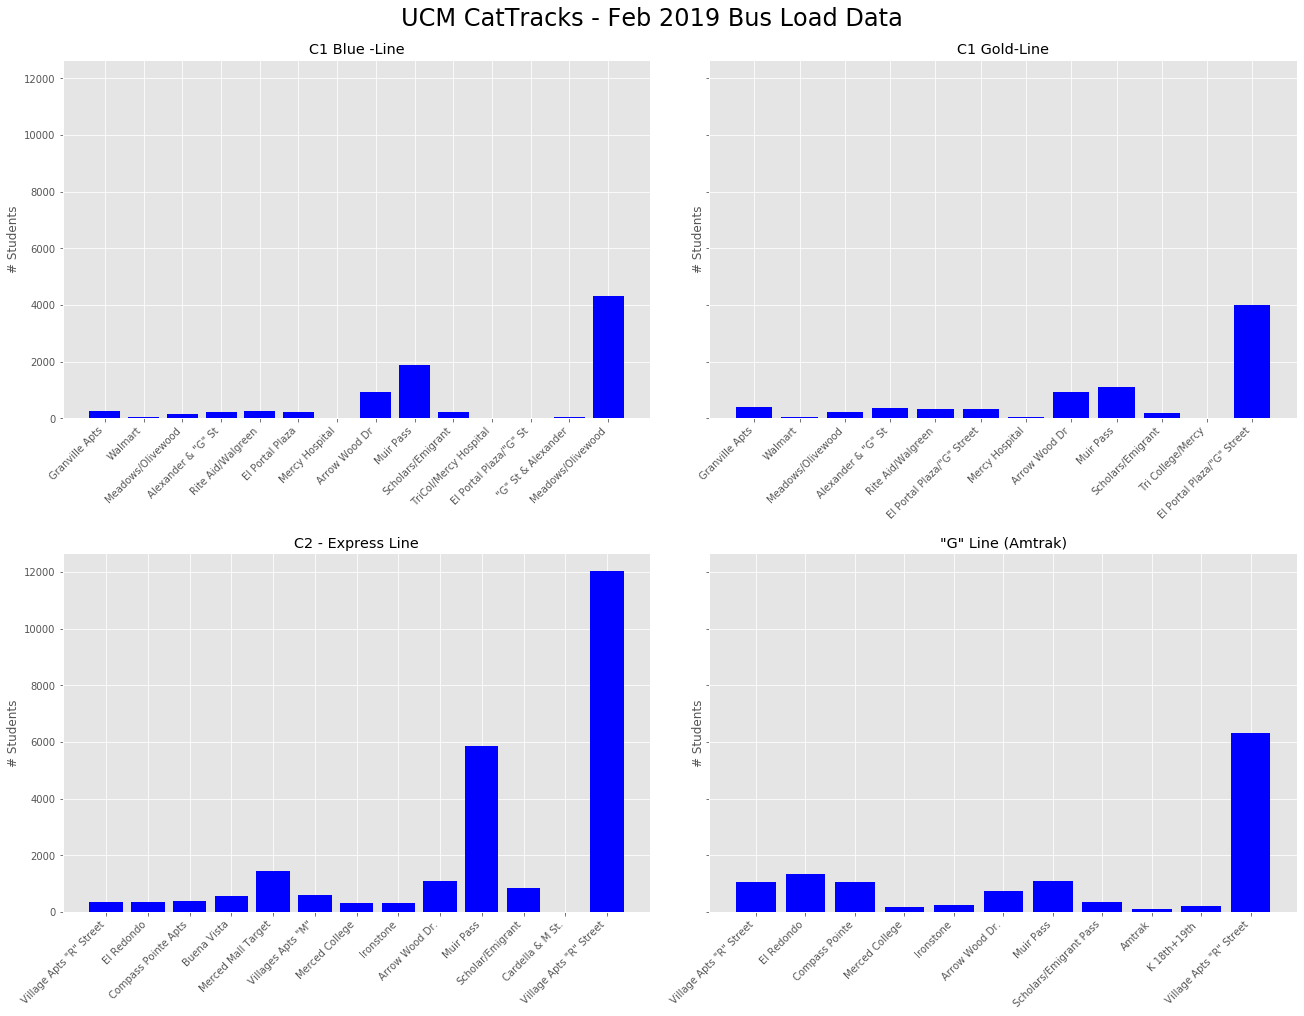

In [30]:
feb_dfs = [feb_c1b, feb_c1g, feb_c2e, feb_g]

fig, axs = plt.subplots(2,2, figsize = (18,14), sharey=True, constrained_layout=True)
for i, ax in enumerate(axs.flat):
    ax.bar(feb_dfs[i].iloc[1:, 0], feb_dfs[i].iloc[1:, -1], color='blue')
    ax.set_xticklabels(labels=feb_dfs[i].iloc[1:, 0], rotation=45, ha='right')
    ax.set_title(feb_dfs[i].iloc[0,0])
    ax.set_ylabel('# Students')

fig.suptitle('UCM CatTracks - Feb 2019 Bus Load Data', fontsize=24)
# fig.savefig('2019-feb-plot.png')

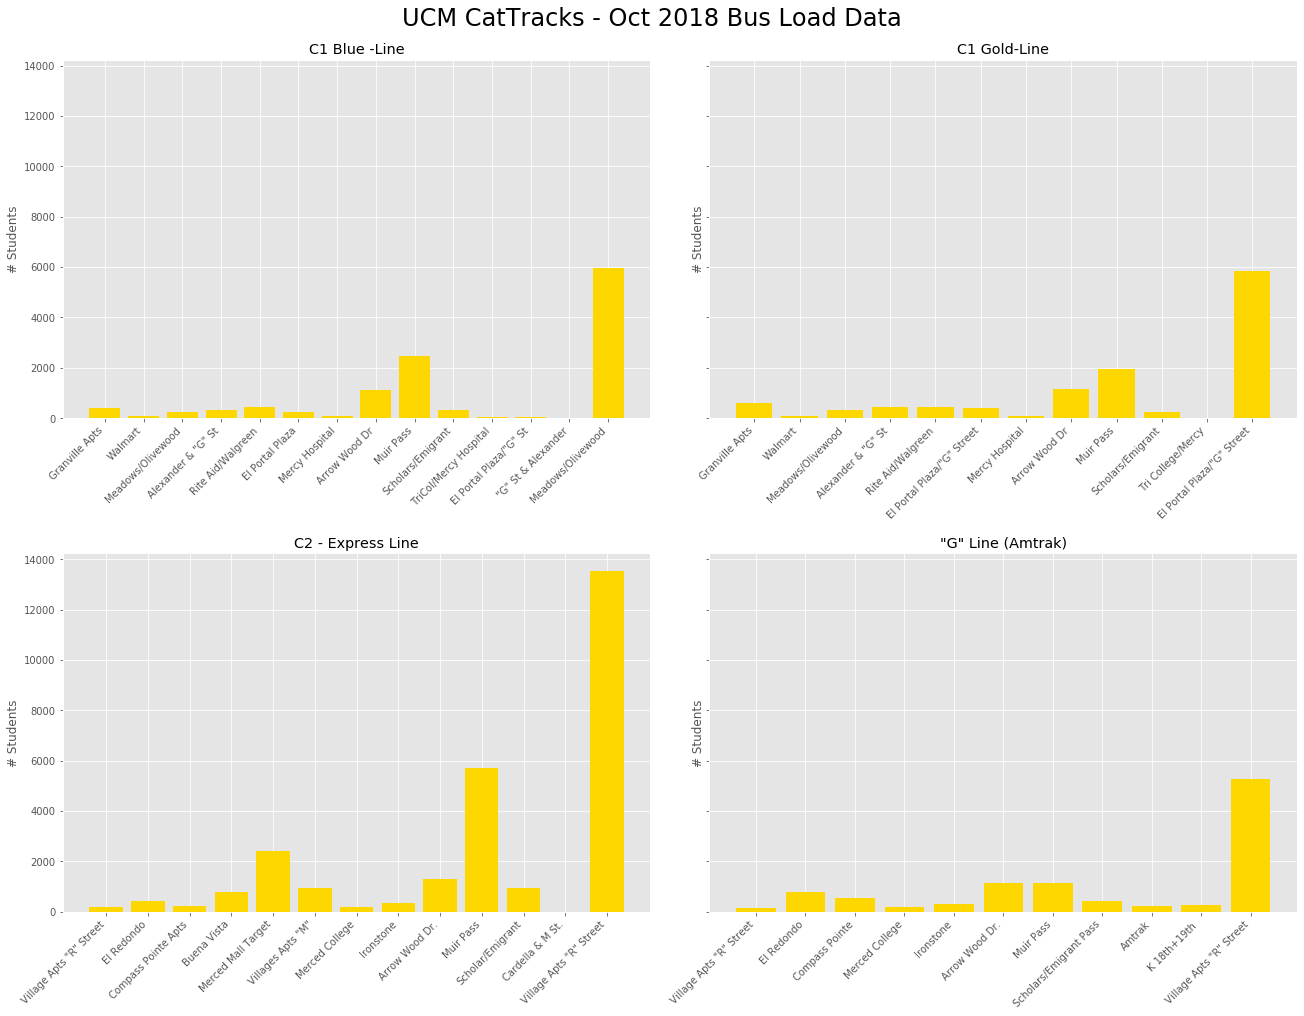

In [31]:
oct_dfs = [oct_c1b, oct_c1g, oct_c2e, oct_g]

fig, axs = plt.subplots(2,2, figsize = (18,14), sharey=True, constrained_layout=True)
for i, ax in enumerate(axs.flat):
    ax.bar(oct_dfs[i].iloc[1:, 0], oct_dfs[i].iloc[1:, -1], color='gold')
    ax.set_xticklabels(labels=oct_dfs[i].iloc[1:, 0], rotation=45, ha='right')
    ax.set_title(oct_dfs[i].iloc[0,0])
    ax.set_ylabel('# Students')

fig.suptitle('UCM CatTracks - Oct 2018 Bus Load Data', fontsize=24)
# fig.savefig('2018-oct-plot.png')

In [ ]:
# Plot time versus student load on bus for february and october
